OmniParser is a screen parsing tool to convert general UI screen to structured elements.

* Caption - Florence2 or Blip2
* OCR - paddleocr
* Icon detection - OmniParser/icon-detect

In [8]:
! pip install -q "ultralytics==8.3.43" "transformers==4.47.0" "paddleocr==2.9.1" "easyocr==1.7.2" pillow torch torchvision supervision matplotlib paddlepaddle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.0 MB/s eta 0:00:00


##### convert .safetensor to .pt

In [2]:
import torch
from ultralytics.nn.tasks import DetectionModel
from safetensors.torch import load_file
import yaml
import os

# Specify the weights directory directly
weights_dir = "/content/weights/icon-detect"
output_name = "best.pt"

# Define file paths
safetensors_path = os.path.join(weights_dir, "model.safetensors")
yaml_path = os.path.join(weights_dir, "model.yaml")
train_args_path = os.path.join(weights_dir, "train_args.yaml")
output_path = os.path.join(weights_dir, output_name)

# Check if required files exist
if not os.path.exists(safetensors_path):
    raise FileNotFoundError(f"{safetensors_path} not found.")
if not os.path.exists(yaml_path):
    raise FileNotFoundError(f"{yaml_path} not found.")

# Load weights from .safetensors
print("Loading weights from .safetensors...")
tensor_dict = load_file(safetensors_path)

# Initialize model from YAML
print("Initializing YOLO model from YAML...")
model = DetectionModel(yaml_path)
model.load_state_dict(tensor_dict)

# Prepare the checkpoint dictionary
save_dict = {"model": model}

# Optionally include training arguments
if os.path.exists(train_args_path):
    print("Loading training arguments...")
    with open(train_args_path, "r") as file:
        train_args = yaml.safe_load(file)
    save_dict.update(train_args)

# Save the model as a .pt file
print(f"Saving the converted model to {output_path}...")
torch.save(save_dict, output_path)

print("Conversion completed successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading weights from .safetensors...
Initializing YOLO model from YAML...

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultral

In [ ]:
from ultralytics import YOLO

device = 'cuda'
model_path='/content/weights/icon-detect/best.pt'

icon_model = YOLO(model_path)
icon_model.to(device)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

##### caption_model = "Blip2"

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration

model_name_or_path = "Salesforce/blip2-opt-2.7b"
processor = Blip2Processor.from_pretrained(model_name_or_path)
model = Blip2ForConditionalGeneration.from_pretrained(model_name_or_path, device_map=None, torch_dtype=torch.float16).to(device)

##### caption_model = "Florence2"

In [5]:
from transformers import AutoProcessor, AutoModelForCausalLM

model_name_or_path = "microsoft/Florence-2-base"
processor = AutoProcessor.from_pretrained(model_name_or_path, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_name_or_path, torch_dtype=torch.float16, trust_remote_code=True).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

In [6]:
icon_model.device, type(icon_model)

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [10]:
import io
import base64
import time
from PIL import Image, ImageDraw, ImageFont
import json
import requests
import cv2
import numpy as np
from matplotlib import pyplot as plt
import easyocr
from paddleocr import PaddleOCR
reader = easyocr.Reader(['en'])
paddle_ocr = PaddleOCR(
    lang='en',  # other lang also available
    use_angle_cls=False,
    use_gpu=False,  # using cuda will conflict with pytorch in the same process
    show_log=False,
    max_batch_size=1024,
    use_dilation=True,  # improves accuracy
    det_db_score_mode='slow',  # improves accuracy
    rec_batch_num=1024)

from torchvision.ops import box_convert
import re
from torchvision.transforms import ToPILImage
import supervision as sv
import torchvision.transforms as T
from typing import Tuple, List
import ast

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completedownload https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:17<00:00, 221.71it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 526.35it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:14<00:00, 144.27it/s]


In [ ]:
image_path = '/content/google.png'
image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)
image

##### check_ocr_box

In [12]:
def get_xywh(input):
    x, y, w, h = input[0][0], input[0][1], input[2][0] - input[0][0], input[2][1] - input[0][1]
    x, y, w, h = int(x), int(y), int(w), int(h)
    return x, y, w, h

def get_xyxy(input):
    x, y, xp, yp = input[0][0], input[0][1], input[2][0], input[2][1]
    x, y, xp, yp = int(x), int(y), int(xp), int(yp)
    return x, y, xp, yp

def get_xywh_yolo(input):
    x, y, w, h = input[0], input[1], input[2] - input[0], input[3] - input[1]
    x, y, w, h = int(x), int(y), int(w), int(h)
    return x, y, w, h

def check_ocr_box(image_path, display_img = True, output_bb_format='xywh', goal_filtering=None, easyocr_args=None, use_paddleocr=False):
    if use_paddleocr:
        if easyocr_args is None:
            text_threshold = 0.5
        else:
            text_threshold = easyocr_args['text_threshold']
        result = paddle_ocr.ocr(image_path, cls=False)[0]
        conf = [item[1] for item in result]
        coord = [item[0] for item in result if item[1][1] > text_threshold]
        text = [item[1][0] for item in result if item[1][1] > text_threshold]
    else:  # EasyOCR
        if easyocr_args is None:
            easyocr_args = {}
        result = reader.readtext(image_path, **easyocr_args)
        # print('goal filtering pred:', result[-5:])
        coord = [item[0] for item in result]
        text = [item[1] for item in result]
    # read the image using cv2
    if display_img:
        opencv_img = cv2.imread(image_path)
        opencv_img = cv2.cvtColor(opencv_img, cv2.COLOR_RGB2BGR)
        bb = []
        for item in coord:
            x, y, a, b = get_xywh(item)
            # print(x, y, a, b)
            bb.append((x, y, a, b))
            cv2.rectangle(opencv_img, (x, y), (x+a, y+b), (0, 255, 0), 2)

        # Display the image
        plt.imshow(opencv_img)
    else:
        if output_bb_format == 'xywh':
            bb = [get_xywh(item) for item in coord]
        elif output_bb_format == 'xyxy':
            bb = [get_xyxy(item) for item in coord]
        # print('bounding box!!!', bb)
    return (text, bb), goal_filtering

In [13]:
box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.8}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time()

##### get_icon_labeled_img

In [29]:
@torch.inference_mode()
def get_parsed_content_icon(filtered_boxes, starting_idx, image_source, caption_model_processor, prompt=None, batch_size=16):
    # Number of samples per batch, --> 256 roughly takes 23 GB of GPU memory for florence model

    to_pil = ToPILImage()
    if starting_idx:
        non_ocr_boxes = filtered_boxes[starting_idx:]
    else:
        non_ocr_boxes = filtered_boxes
    croped_pil_image = []
    for i, coord in enumerate(non_ocr_boxes):
        xmin, xmax = int(coord[0]*image_source.shape[1]), int(coord[2]*image_source.shape[1])
        ymin, ymax = int(coord[1]*image_source.shape[0]), int(coord[3]*image_source.shape[0])
        cropped_image = image_source[ymin:ymax, xmin:xmax, :]
        croped_pil_image.append(to_pil(cropped_image))

    # model, processor = caption_model_processor['model'], caption_model_processor['processor']
    processor = caption_model_processor
    if not prompt:
        if 'florence' in model.config.name_or_path:
            prompt = "<CAPTION>"
        else:
            prompt = "The image shows"

    generated_texts = []
    device = model.device
    for i in range(0, len(croped_pil_image), batch_size):
        start = time.time()
        batch = croped_pil_image[i:i+batch_size]
        if model.device.type == 'cuda':
            inputs = processor(images=batch, text=[prompt]*len(batch), return_tensors="pt").to(device=device, dtype=torch.float16)
        else:
            inputs = processor(images=batch, text=[prompt]*len(batch), return_tensors="pt").to(device=device)
        if 'florence' in model.config.name_or_path:
            generated_ids = model.generate(input_ids=inputs["input_ids"],pixel_values=inputs["pixel_values"],max_new_tokens=100,num_beams=3, do_sample=False)
        else:
            generated_ids = model.generate(**inputs, max_length=100, num_beams=5, no_repeat_ngram_size=2, early_stopping=True, num_return_sequences=1) # temperature=0.01, do_sample=True,
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
        generated_text = [gen.strip() for gen in generated_text]
        generated_texts.extend(generated_text)

    return generated_texts



def get_parsed_content_icon_phi3v(filtered_boxes, ocr_bbox, image_source, caption_model_processor):
    to_pil = ToPILImage()
    if ocr_bbox:
        non_ocr_boxes = filtered_boxes[len(ocr_bbox):]
    else:
        non_ocr_boxes = filtered_boxes
    croped_pil_image = []
    for i, coord in enumerate(non_ocr_boxes):
        xmin, xmax = int(coord[0]*image_source.shape[1]), int(coord[2]*image_source.shape[1])
        ymin, ymax = int(coord[1]*image_source.shape[0]), int(coord[3]*image_source.shape[0])
        cropped_image = image_source[ymin:ymax, xmin:xmax, :]
        croped_pil_image.append(to_pil(cropped_image))

    # model, processor = caption_model_processor['model'], caption_model_processor['processor']
    processor = caption_model_processor
    device = model.device
    messages = [{"role": "user", "content": "<|image_1|>\ndescribe the icon in one sentence"}]
    prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    batch_size = 5  # Number of samples per batch
    generated_texts = []

    for i in range(0, len(croped_pil_image), batch_size):
        images = croped_pil_image[i:i+batch_size]
        image_inputs = [processor.image_processor(x, return_tensors="pt") for x in images]
        inputs ={'input_ids': [], 'attention_mask': [], 'pixel_values': [], 'image_sizes': []}
        texts = [prompt] * len(images)
        for i, txt in enumerate(texts):
            input = processor._convert_images_texts_to_inputs(image_inputs[i], txt, return_tensors="pt")
            inputs['input_ids'].append(input['input_ids'])
            inputs['attention_mask'].append(input['attention_mask'])
            inputs['pixel_values'].append(input['pixel_values'])
            inputs['image_sizes'].append(input['image_sizes'])
        max_len = max([x.shape[1] for x in inputs['input_ids']])
        for i, v in enumerate(inputs['input_ids']):
            inputs['input_ids'][i] = torch.cat([processor.tokenizer.pad_token_id * torch.ones(1, max_len - v.shape[1], dtype=torch.long), v], dim=1)
            inputs['attention_mask'][i] = torch.cat([torch.zeros(1, max_len - v.shape[1], dtype=torch.long), inputs['attention_mask'][i]], dim=1)
        inputs_cat = {k: torch.concatenate(v).to(device) for k, v in inputs.items()}

        generation_args = {
            "max_new_tokens": 25,
            "temperature": 0.01,
            "do_sample": False,
        }
        generate_ids = model.generate(**inputs_cat, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)
        # # remove input tokens
        generate_ids = generate_ids[:, inputs_cat['input_ids'].shape[1]:]
        response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)
        response = [res.strip('\n').strip() for res in response]
        generated_texts.extend(response)

    return generated_texts

In [31]:
from supervision.detection.core import Detections
from supervision.draw.color import Color, ColorPalette
from typing import List, Optional, Union, Tuple


class BoxAnnotator:
    """
    A class for drawing bounding boxes on an image using detections provided.

    Attributes:
        color (Union[Color, ColorPalette]): The color to draw the bounding box,
            can be a single color or a color palette
        thickness (int): The thickness of the bounding box lines, default is 2
        text_color (Color): The color of the text on the bounding box, default is white
        text_scale (float): The scale of the text on the bounding box, default is 0.5
        text_thickness (int): The thickness of the text on the bounding box,
            default is 1
        text_padding (int): The padding around the text on the bounding box,
            default is 5

    """

    def __init__(
        self,
        color: Union[Color, ColorPalette] = ColorPalette.DEFAULT,
        thickness: int = 3, # 1 for seeclick 2 for mind2web and 3 for demo
        text_color: Color = Color.BLACK,
        text_scale: float = 0.5, # 0.8 for mobile/web, 0.3 for desktop # 0.4 for mind2web
        text_thickness: int = 2, #1, # 2 for demo
        text_padding: int = 10,
        avoid_overlap: bool = True,
    ):
        self.color: Union[Color, ColorPalette] = color
        self.thickness: int = thickness
        self.text_color: Color = text_color
        self.text_scale: float = text_scale
        self.text_thickness: int = text_thickness
        self.text_padding: int = text_padding
        self.avoid_overlap: bool = avoid_overlap

    def annotate(
        self,
        scene: np.ndarray,
        detections: Detections,
        labels: Optional[List[str]] = None,
        skip_label: bool = False,
        image_size: Optional[Tuple[int, int]] = None,
    ) -> np.ndarray:
        """
        Draws bounding boxes on the frame using the detections provided.

        Args:
            scene (np.ndarray): The image on which the bounding boxes will be drawn
            detections (Detections): The detections for which the
                bounding boxes will be drawn
            labels (Optional[List[str]]): An optional list of labels
                corresponding to each detection. If `labels` are not provided,
                corresponding `class_id` will be used as label.
            skip_label (bool): Is set to `True`, skips bounding box label annotation.
        Returns:
            np.ndarray: The image with the bounding boxes drawn on it

        Example:
            ```python
            import supervision as sv

            classes = ['person', ...]
            image = ...
            detections = sv.Detections(...)

            box_annotator = sv.BoxAnnotator()
            labels = [
                f"{classes[class_id]} {confidence:0.2f}"
                for _, _, confidence, class_id, _ in detections
            ]
            annotated_frame = box_annotator.annotate(
                scene=image.copy(),
                detections=detections,
                labels=labels
            )
            ```
        """
        font = cv2.FONT_HERSHEY_SIMPLEX
        for i in range(len(detections)):
            x1, y1, x2, y2 = detections.xyxy[i].astype(int)
            class_id = (
                detections.class_id[i] if detections.class_id is not None else None
            )
            idx = class_id if class_id is not None else i
            color = (
                self.color.by_idx(idx)
                if isinstance(self.color, ColorPalette)
                else self.color
            )
            cv2.rectangle(
                img=scene,
                pt1=(x1, y1),
                pt2=(x2, y2),
                color=color.as_bgr(),
                thickness=self.thickness,
            )
            if skip_label:
                continue

            text = (
                f"{class_id}"
                if (labels is None or len(detections) != len(labels))
                else labels[i]
            )

            text_width, text_height = cv2.getTextSize(
                text=text,
                fontFace=font,
                fontScale=self.text_scale,
                thickness=self.text_thickness,
            )[0]

            if not self.avoid_overlap:
                text_x = x1 + self.text_padding
                text_y = y1 - self.text_padding

                text_background_x1 = x1
                text_background_y1 = y1 - 2 * self.text_padding - text_height

                text_background_x2 = x1 + 2 * self.text_padding + text_width
                text_background_y2 = y1
            else:
                text_x, text_y, text_background_x1, text_background_y1, text_background_x2, text_background_y2 = get_optimal_label_pos(self.text_padding, text_width, text_height, x1, y1, x2, y2, detections, image_size)

            cv2.rectangle(
                img=scene,
                pt1=(text_background_x1, text_background_y1),
                pt2=(text_background_x2, text_background_y2),
                color=color.as_bgr(),
                thickness=cv2.FILLED,
            )
            # import pdb; pdb.set_trace()
            box_color = color.as_rgb()
            luminance = 0.299 * box_color[0] + 0.587 * box_color[1] + 0.114 * box_color[2]
            text_color = (0,0,0) if luminance > 160 else (255,255,255)
            cv2.putText(
                img=scene,
                text=text,
                org=(text_x, text_y),
                fontFace=font,
                fontScale=self.text_scale,
                # color=self.text_color.as_rgb(),
                color=text_color,
                thickness=self.text_thickness,
                lineType=cv2.LINE_AA,
            )
        return scene


def box_area(box):
        return (box[2] - box[0]) * (box[3] - box[1])

def intersection_area(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    return max(0, x2 - x1) * max(0, y2 - y1)

def IoU(box1, box2, return_max=True):
    intersection = intersection_area(box1, box2)
    union = box_area(box1) + box_area(box2) - intersection
    if box_area(box1) > 0 and box_area(box2) > 0:
        ratio1 = intersection / box_area(box1)
        ratio2 = intersection / box_area(box2)
    else:
        ratio1, ratio2 = 0, 0
    if return_max:
        return max(intersection / union, ratio1, ratio2)
    else:
        return intersection / union


def get_optimal_label_pos(text_padding, text_width, text_height, x1, y1, x2, y2, detections, image_size):
    """ check overlap of text and background detection box, and get_optimal_label_pos,
        pos: str, position of the text, must be one of 'top left', 'top right', 'outer left', 'outer right' TODO: if all are overlapping, return the last one, i.e. outer right
        Threshold: default to 0.3
    """

    def get_is_overlap(detections, text_background_x1, text_background_y1, text_background_x2, text_background_y2, image_size):
        is_overlap = False
        for i in range(len(detections)):
            detection = detections.xyxy[i].astype(int)
            if IoU([text_background_x1, text_background_y1, text_background_x2, text_background_y2], detection) > 0.3:
                is_overlap = True
                break
        # check if the text is out of the image
        if text_background_x1 < 0 or text_background_x2 > image_size[0] or text_background_y1 < 0 or text_background_y2 > image_size[1]:
            is_overlap = True
        return is_overlap

    # if pos == 'top left':
    text_x = x1 + text_padding
    text_y = y1 - text_padding

    text_background_x1 = x1
    text_background_y1 = y1 - 2 * text_padding - text_height

    text_background_x2 = x1 + 2 * text_padding + text_width
    text_background_y2 = y1
    is_overlap = get_is_overlap(detections, text_background_x1, text_background_y1, text_background_x2, text_background_y2, image_size)
    if not is_overlap:
        return text_x, text_y, text_background_x1, text_background_y1, text_background_x2, text_background_y2

    # elif pos == 'outer left':
    text_x = x1 - text_padding - text_width
    text_y = y1 + text_padding + text_height

    text_background_x1 = x1 - 2 * text_padding - text_width
    text_background_y1 = y1

    text_background_x2 = x1
    text_background_y2 = y1 + 2 * text_padding + text_height
    is_overlap = get_is_overlap(detections, text_background_x1, text_background_y1, text_background_x2, text_background_y2, image_size)
    if not is_overlap:
        return text_x, text_y, text_background_x1, text_background_y1, text_background_x2, text_background_y2


    # elif pos == 'outer right':
    text_x = x2 + text_padding
    text_y = y1 + text_padding + text_height

    text_background_x1 = x2
    text_background_y1 = y1

    text_background_x2 = x2 + 2 * text_padding + text_width
    text_background_y2 = y1 + 2 * text_padding + text_height

    is_overlap = get_is_overlap(detections, text_background_x1, text_background_y1, text_background_x2, text_background_y2, image_size)
    if not is_overlap:
        return text_x, text_y, text_background_x1, text_background_y1, text_background_x2, text_background_y2

    # elif pos == 'top right':
    text_x = x2 - text_padding - text_width
    text_y = y1 - text_padding

    text_background_x1 = x2 - 2 * text_padding - text_width
    text_background_y1 = y1 - 2 * text_padding - text_height

    text_background_x2 = x2
    text_background_y2 = y1

    is_overlap = get_is_overlap(detections, text_background_x1, text_background_y1, text_background_x2, text_background_y2, image_size)
    if not is_overlap:
        return text_x, text_y, text_background_x1, text_background_y1, text_background_x2, text_background_y2

    return text_x, text_y, text_background_x1, text_background_y1, text_background_x2, text_background_y2

In [23]:
def remove_overlap_new(boxes, iou_threshold, ocr_bbox=None):
    '''
    ocr_bbox format: [{'type': 'text', 'bbox':[x,y], 'interactivity':False, 'content':str }, ...]
    boxes format: [{'type': 'icon', 'bbox':[x,y], 'interactivity':True, 'content':None }, ...]

    '''
    assert ocr_bbox is None or isinstance(ocr_bbox, List)

    def box_area(box):
        return (box[2] - box[0]) * (box[3] - box[1])

    def intersection_area(box1, box2):
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[2], box2[2])
        y2 = min(box1[3], box2[3])
        return max(0, x2 - x1) * max(0, y2 - y1)

    def IoU(box1, box2):
        intersection = intersection_area(box1, box2)
        union = box_area(box1) + box_area(box2) - intersection + 1e-6
        if box_area(box1) > 0 and box_area(box2) > 0:
            ratio1 = intersection / box_area(box1)
            ratio2 = intersection / box_area(box2)
        else:
            ratio1, ratio2 = 0, 0
        return max(intersection / union, ratio1, ratio2)

    def is_inside(box1, box2):
        # return box1[0] >= box2[0] and box1[1] >= box2[1] and box1[2] <= box2[2] and box1[3] <= box2[3]
        intersection = intersection_area(box1, box2)
        ratio1 = intersection / box_area(box1)
        return ratio1 > 0.80

    # boxes = boxes.tolist()
    filtered_boxes = []
    if ocr_bbox:
        filtered_boxes.extend(ocr_bbox)
    # print('ocr_bbox!!!', ocr_bbox)
    for i, box1_elem in enumerate(boxes):
        box1 = box1_elem['bbox']
        is_valid_box = True
        for j, box2_elem in enumerate(boxes):
            # keep the smaller box
            box2 = box2_elem['bbox']
            if i != j and IoU(box1, box2) > iou_threshold and box_area(box1) > box_area(box2):
                is_valid_box = False
                break
        if is_valid_box:
            # add the following 2 lines to include ocr bbox
            if ocr_bbox:
                # keep yolo boxes + prioritize ocr label
                box_added = False
                for box3_elem in ocr_bbox:
                    if not box_added:
                        box3 = box3_elem['bbox']
                        if is_inside(box3, box1): # ocr inside icon
                            # box_added = True
                            # delete the box3_elem from ocr_bbox
                            try:
                                filtered_boxes.append({'type': 'text', 'bbox': box1_elem['bbox'], 'interactivity': True, 'content': box3_elem['content']})
                                filtered_boxes.remove(box3_elem)
                                # print('remove ocr bbox:', box3_elem)
                            except:
                                continue
                            # break
                        elif is_inside(box1, box3): # icon inside ocr
                            box_added = True
                            # try:
                            #     filtered_boxes.append({'type': 'icon', 'bbox': box1_elem['bbox'], 'interactivity': True, 'content': None})
                            #     filtered_boxes.remove(box3_elem)
                            # except:
                            #     continue
                            break
                        else:
                            continue
                if not box_added:
                    filtered_boxes.append({'type': 'icon', 'bbox': box1_elem['bbox'], 'interactivity': True, 'content': None})

            else:
                filtered_boxes.append(box1)
    return filtered_boxes # torch.tensor(filtered_boxes)



def annotate(image_source: np.ndarray, boxes: torch.Tensor, logits: torch.Tensor, phrases: List[str], text_scale: float,
             text_padding=5, text_thickness=2, thickness=3) -> np.ndarray:
    """
    This function annotates an image with bounding boxes and labels.

    Parameters:
    image_source (np.ndarray): The source image to be annotated.
    boxes (torch.Tensor): A tensor containing bounding box coordinates. in cxcywh format, pixel scale
    logits (torch.Tensor): A tensor containing confidence scores for each bounding box.
    phrases (List[str]): A list of labels for each bounding box.
    text_scale (float): The scale of the text to be displayed. 0.8 for mobile/web, 0.3 for desktop # 0.4 for mind2web

    Returns:
    np.ndarray: The annotated image.
    """
    h, w, _ = image_source.shape
    boxes = boxes * torch.Tensor([w, h, w, h])
    xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()
    xywh = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xywh").numpy()
    detections = sv.Detections(xyxy=xyxy)

    labels = [f"{phrase}" for phrase in range(boxes.shape[0])]

    box_annotator = BoxAnnotator(text_scale=text_scale, text_padding=text_padding,text_thickness=text_thickness,thickness=thickness) # 0.8 for mobile/web, 0.3 for desktop # 0.4 for mind2web
    annotated_frame = image_source.copy()
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels, image_size=(w,h))

    label_coordinates = {f"{phrase}": v for phrase, v in zip(phrases, xywh)}
    return annotated_frame, label_coordinates


def predict(model, image, caption, box_threshold, text_threshold):

    model, processor = model['model'], model['processor']
    device = model.device

    inputs = processor(images=image, text=caption, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    results = processor.post_process_grounded_object_detection(
        outputs,
        inputs.input_ids,
        box_threshold=box_threshold, # 0.4,
        text_threshold=text_threshold, # 0.3,
        target_sizes=[image.size[::-1]]
    )[0]
    boxes, logits, phrases = results["boxes"], results["scores"], results["labels"]
    return boxes, logits, phrases


def predict_yolo(model, image_path, box_threshold, imgsz, scale_img, iou_threshold=0.7):

    if scale_img:
        result = model.predict(
        source=image_path,
        conf=box_threshold,
        imgsz=imgsz,
        iou=iou_threshold, # default 0.7
        )
    else:
        result = model.predict(
        source=image_path,
        conf=box_threshold,
        iou=iou_threshold, # default 0.7
        )
    boxes = result[0].boxes.xyxy#.tolist() # in pixel space
    conf = result[0].boxes.conf
    phrases = [str(i) for i in range(len(boxes))]

    return boxes, conf, phrases


def get_icon_labeled_img(img_path, icon_model=None, BOX_TRESHOLD = 0.01, output_coord_in_ratio=False, ocr_bbox=None, text_scale=0.4, text_padding=5, draw_bbox_config=None, caption_model_processor=None, ocr_text=[], use_local_semantics=True, iou_threshold=0.9,prompt=None, scale_img=False, imgsz=None, batch_size=None):
    """ ocr_bbox: list of xyxy format bbox
    """
    image_source = Image.open(img_path).convert("RGB")
    w, h = image_source.size
    if not imgsz:
        imgsz = (h, w)
    # print('image size:', w, h)
    xyxy, logits, phrases = predict_yolo(model=icon_model, image_path=img_path, box_threshold=BOX_TRESHOLD, imgsz=imgsz, scale_img=scale_img, iou_threshold=0.1)
    xyxy = xyxy / torch.Tensor([w, h, w, h]).to(xyxy.device)
    image_source = np.asarray(image_source)
    phrases = [str(i) for i in range(len(phrases))]

    # annotate the image with labels
    h, w, _ = image_source.shape
    if ocr_bbox:
        ocr_bbox = torch.tensor(ocr_bbox) / torch.Tensor([w, h, w, h])
        ocr_bbox=ocr_bbox.tolist()
    else:
        print('no ocr bbox!!!')
        ocr_bbox = None

    ocr_bbox_elem = [{'type': 'text', 'bbox':box, 'interactivity':False, 'content':txt} for box, txt in zip(ocr_bbox, ocr_text)]
    xyxy_elem = [{'type': 'icon', 'bbox':box, 'interactivity':True, 'content':None} for box in xyxy.tolist()]
    filtered_boxes = remove_overlap_new(boxes=xyxy_elem, iou_threshold=iou_threshold, ocr_bbox=ocr_bbox_elem)

    # sort the filtered_boxes so that the one with 'content': None is at the end, and get the index of the first 'content': None
    filtered_boxes_elem = sorted(filtered_boxes, key=lambda x: x['content'] is None)
    # get the index of the first 'content': None
    starting_idx = next((i for i, box in enumerate(filtered_boxes_elem) if box['content'] is None), -1)
    filtered_boxes = torch.tensor([box['bbox'] for box in filtered_boxes_elem])


    # get parsed icon local semantics
    if use_local_semantics:
        caption_model = model
        if 'phi3_v' in caption_model.config.model_type:
            parsed_content_icon = get_parsed_content_icon_phi3v(filtered_boxes, ocr_bbox, image_source, caption_model_processor)
        else:
            parsed_content_icon = get_parsed_content_icon(filtered_boxes, starting_idx, image_source, caption_model_processor, prompt=prompt,batch_size=batch_size)
        ocr_text = [f"Text Box ID {i}: {txt}" for i, txt in enumerate(ocr_text)]
        icon_start = len(ocr_text)
        parsed_content_icon_ls = []
        # fill the filtered_boxes_elem None content with parsed_content_icon in order
        for i, box in enumerate(filtered_boxes_elem):
            if box['content'] is None:
                box['content'] = parsed_content_icon.pop(0)
        for i, txt in enumerate(parsed_content_icon):
            parsed_content_icon_ls.append(f"Icon Box ID {str(i+icon_start)}: {txt}")
        parsed_content_merged = ocr_text + parsed_content_icon_ls
    else:
        ocr_text = [f"Text Box ID {i}: {txt}" for i, txt in enumerate(ocr_text)]
        parsed_content_merged = ocr_text

    filtered_boxes = box_convert(boxes=filtered_boxes, in_fmt="xyxy", out_fmt="cxcywh")

    phrases = [i for i in range(len(filtered_boxes))]

    # draw boxes
    if draw_bbox_config:
        annotated_frame, label_coordinates = annotate(image_source=image_source, boxes=filtered_boxes, logits=logits, phrases=phrases, **draw_bbox_config)
    else:
        annotated_frame, label_coordinates = annotate(image_source=image_source, boxes=filtered_boxes, logits=logits, phrases=phrases, text_scale=text_scale, text_padding=text_padding)

    pil_img = Image.fromarray(annotated_frame)
    buffered = io.BytesIO()
    pil_img.save(buffered, format="PNG")
    encoded_image = base64.b64encode(buffered.getvalue()).decode('ascii')
    if output_coord_in_ratio:
        # h, w, _ = image_source.shape
        label_coordinates = {k: [v[0]/w, v[1]/h, v[2]/w, v[3]/h] for k, v in label_coordinates.items()}
        assert w == annotated_frame.shape[1] and h == annotated_frame.shape[0]

    return encoded_image, label_coordinates, filtered_boxes_elem


In [32]:
dino_labled_img, label_coordinates, parsed_content_list = get_icon_labeled_img(image_path, icon_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time()


image 1/1 /content/google.png: 448x640 44 0s, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


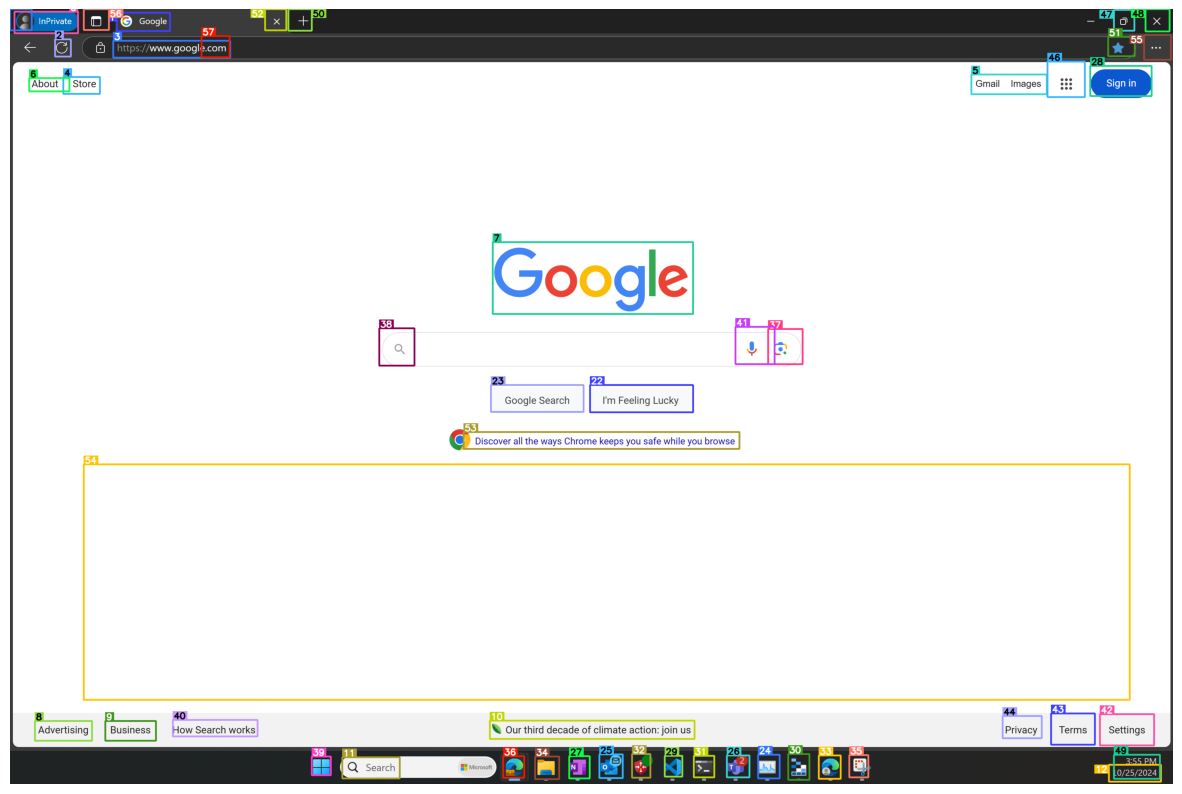

In [33]:
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)

In [34]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,ID
0,text,"[0.004013584461063147, 0.003242241684347391, 0...",False,9InPrivate,0
1,text,"[0.09169496595859528, 0.0046317740343511105, 0...",False,G Google,1
2,text,"[0.03859215974807739, 0.03890690207481384, 0.0...",False,C,2
3,text,"[0.08860759437084198, 0.0407596118748188, 0.18...",False,https://www.google.com,3
4,text,"[0.04569311439990997, 0.08754052966833115, 0.0...",False,Store,4
5,text,"[0.8264896869659424, 0.0842982828617096, 0.891...",False,GmailImages,5
6,text,"[0.016671812161803246, 0.08893006294965744, 0....",False,About,6
7,text,"[0.4149428904056549, 0.30060213804244995, 0.58...",False,Google,7
8,text,"[0.02130287140607834, 0.9184807538986206, 0.07...",False,Advertising,8
9,text,"[0.08181537687778473, 0.9184807538986206, 0.12...",False,Business,9
